In [1]:
from sklearn import datasets, preprocessing, feature_selection
from itertools import compress

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In this excercise we will use the [Boston housing](https://www.kaggle.com/c/boston-housing) dataset available in the `scikit-learn` library. After loading the dataset display its description and familiarize yourself with the interpretation of features.

In [2]:
boston = datasets.load_boston()

print(boston.DESCR)

print('Data shape: ', boston.data.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\ProgramData\Anaconda3\envs\data-mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

# Feature selection

## Removing attributes with low variance

Firstly, we will use a simple filter to remove features where 75% of instances share the same value. We will use the [VarianceThreshold](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) class. Observe the results of the filtering and experiment with the threshold.

In [21]:
boston.data.shape

(506, 13)

In [4]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
boston_new = sel.fit_transform(boston.data)

print('Data shape: ', boston_new.data.shape)

feature_names = compress(boston.feature_names, sel.get_support())

pd.DataFrame(boston_new, columns=feature_names)

Data shape:  (506, 11)


,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Select features using linear regression

Our next selector will be [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which we will use to find the best 2 features to predict the price of the house using a simple linear regression. 

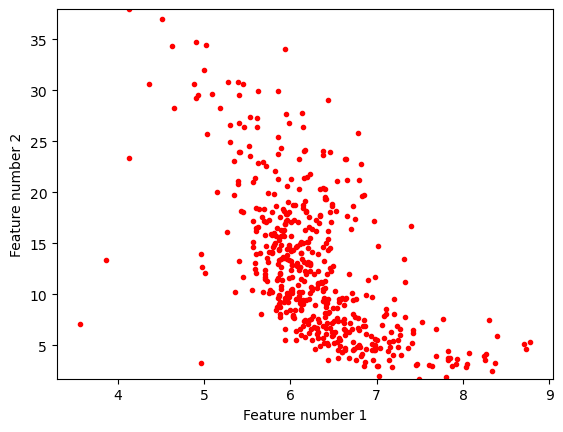

In [5]:
from sklearn.feature_selection import SelectKBest, f_regression

boston_new = SelectKBest(f_regression, k=2).fit_transform(boston.data, boston.target)

feature1 = boston_new[:, 0]
feature2 = boston_new[:, 1]

plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()


## Select features using linear regression and regularization

The next example shows how to find the best 2 attributes to predict the price of the house using linear regression, where regression coefficients are regularized with L1. We will use the [SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) class. Regularization is available through [LassoCV](http://scikit-learn.org/stable/modules/linear_model.html#lasso) class.

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

clf = LassoCV()

sfm = SelectFromModel(clf, threshold=0.1)
sfm.fit(boston.data, boston.target)
n_rows, n_features = sfm.transform(boston.data).shape

while n_features > 2:
    sfm.threshold += 0.05
    boston_new = sfm.transform(boston.data)
    n_rows, n_features = boston_new.shape
    
    feature_names = compress(boston.feature_names, sfm.get_support())
    print(f'Threshold={sfm.threshold} Num features: {n_features}, {list(feature_names)}')

feature1 = boston_new[:, 0]
feature2 = boston_new[:, 1]

plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

TypeError: __init__() got an unexpected keyword argument 'alpha'

## Recursive feature selection

The last example involves the [Recursive Feature Extraction](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) class to perform greedy selection of the features by evaluating each subset of features on the dataset using a classifer/regressor.

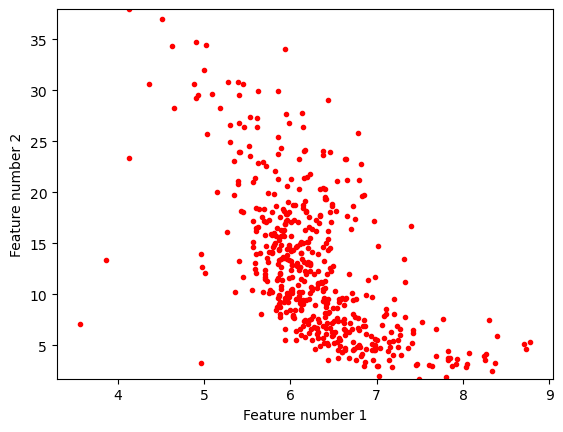

In [7]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

# object which will be used to score the current selection
estimator = DecisionTreeRegressor()

# object performing recursive feature selection
selector = RFE(estimator, n_features_to_select=2, step=1)

selector = selector.fit(boston.data, boston.target)

boston_new = boston.data[:,selector.support_]

feature1 = boston_new[:, 0]
feature2 = boston_new[:, 1]

plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [8]:
for (attr, rank, selected) in zip(boston.feature_names, selector.ranking_, selector.support_):
    print(f'{attr:>10}: rank={rank:<2} selected={selected}')

      CRIM: rank=2  selected=False
        ZN: rank=11 selected=False
     INDUS: rank=9  selected=False
      CHAS: rank=10 selected=False
       NOX: rank=4  selected=False
        RM: rank=1  selected=True
       AGE: rank=6  selected=False
       DIS: rank=3  selected=False
       RAD: rank=12 selected=False
       TAX: rank=5  selected=False
   PTRATIO: rank=7  selected=False
         B: rank=8  selected=False
     LSTAT: rank=1  selected=True
